In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load final dataset
df = pd.read_csv(
    "C:/Users/DuminduS/Desktop/UWE/CSCT Masters Project/datasets/Final data/Final02.csv"
)

df["date"] = pd.to_datetime(df["date"], format="mixed", dayfirst=True)

df.head()


,station_id,date,sessions,energy_kwh,mean_charge_duration_min,latitude,longitude,n_connectors,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windspeed_10m_mean,avg_daily_traffic_nearby
0,BRI_0000,2024-01-01,22,602.991,133.911205,51.542927,-2.568751,6,12.0,7.3,8.7,16.6,16.6,0.0,43.0,25.5,8465
1,BRI_0000,2024-01-02,44,984.970,136.226415,51.542927,-2.568751,6,13.4,9.1,10.7,8.7,8.7,0.0,53.7,29.7,8465
2,BRI_0000,2024-01-03,32,582.430,136.061438,51.542927,-2.568751,6,9.7,7.8,8.7,2.2,2.2,0.0,27.9,23.8,8465
3,BRI_0000,2024-01-04,32,753.940,161.179459,51.542927,-2.568751,6,8.3,5.4,6.8,8.4,8.4,0.0,28.5,16.8,8465
4,BRI_0000,2024-01-05,40,797.936,114.216709,51.542927,-2.568751,6,7.5,3.8,5.3,0.0,0.0,0.0,14.5,9.9,8465


In [3]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
df.info()


Rows: 53067
Columns: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53067 entries, 0 to 53066
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   station_id                53067 non-null  object        
 1   date                      53067 non-null  datetime64[ns]
 2   sessions                  53067 non-null  int64         
 3   energy_kwh                53067 non-null  float64       
 4   mean_charge_duration_min  53067 non-null  float64       
 5   latitude                  53067 non-null  float64       
 6   longitude                 53067 non-null  float64       
 7   n_connectors              53067 non-null  int64         
 8   temperature_2m_max        53067 non-null  float64       
 9   temperature_2m_min        53067 non-null  float64       
 10  temperature_2m_mean       53067 non-null  float64       
 11  precipitation_sum         53067 non-null  float64       

In [5]:
df.describe()


,date,sessions,energy_kwh,mean_charge_duration_min,latitude,longitude,n_connectors,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windspeed_10m_mean,avg_daily_traffic_nearby
count,53067,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000,53067.000000
mean,2024-07-01 12:02:38.742721024,31.266644,702.341792,141.612876,51.465918,-2.589142,2.379388,14.526906,8.530985,11.544378,3.385761,3.343683,0.029455,23.284932,15.889178,9605.332165
min,2024-01-01 00:00:00,1.000000,1.000000,5.000000,51.158219,-2.986069,1.000000,2.900000,-5.000000,-1.400000,0.000000,0.000000,0.000000,5.000000,3.000000,8.000000
25%,2024-04-01 00:00:00,11.000000,246.025500,113.011207,51.448399,-2.609258,1.000000,11.300000,5.800000,8.600000,0.100000,0.100000,0.000000,16.500000,10.800000,2325.000000
50%,2024-07-02 00:00:00,17.000000,388.703000,139.363333,51.459549,-2.588565,1.000000,14.400000,8.800000,11.500000,0.800000,0.800000,0.000000,22.700000,15.500000,8465.000000
75%,2024-10-01 00:00:00,31.000000,705.362500,166.604300,51.494078,-2.554912,2.000000,18.300000,11.400000,14.800000,4.200000,4.200000,0.000000,28.500000,20.100000,12220.000000
max,2024-12-31 00:00:00,354.000000,8392.658000,600.000000,51.826547,-2.277202,14.000000,28.200000,17.500000,22.400000,36.000000,36.000000,6.370000,53.700000,38.400000,46096.000000
std,NaN,42.811106,965.342468,46.870207,0.061011,0.079399,2.540965,4.890318,4.160686,4.419249,5.696095,5.653591,0.358016,8.874212,6.605102,9735.460486


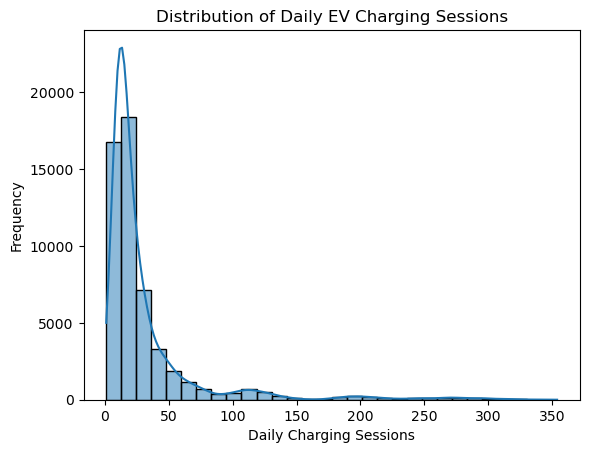

In [7]:
plt.figure()
sns.histplot(df["sessions"], bins=30, kde=True)
plt.xlabel("Daily Charging Sessions")
plt.ylabel("Frequency")
plt.title("Distribution of Daily EV Charging Sessions")
plt.show()


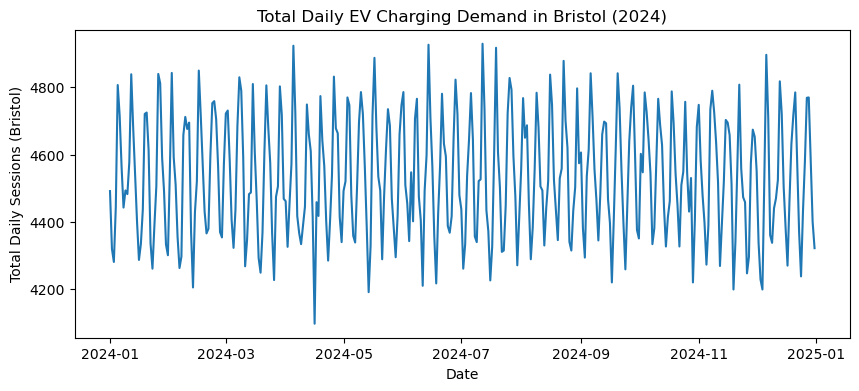

In [9]:
daily_total = df.groupby("date")["sessions"].sum()

plt.figure(figsize=(10,4))
plt.plot(daily_total)
plt.xlabel("Date")
plt.ylabel("Total Daily Sessions (Bristol)")
plt.title("Total Daily EV Charging Demand in Bristol (2024)")
plt.show()


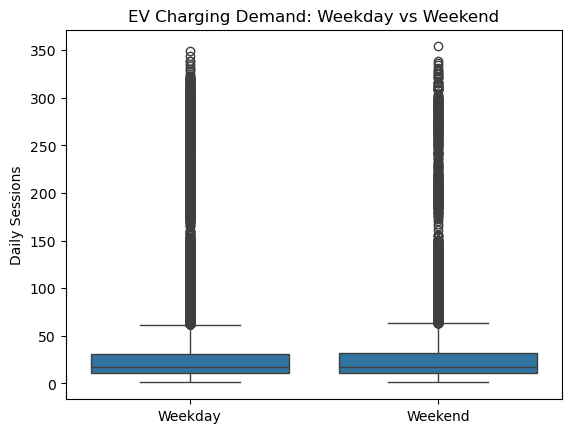

In [11]:
df["day_of_week"] = df["date"].dt.dayofweek
df["is_weekend"] = df["day_of_week"].isin([5,6]).astype(int)

plt.figure()
sns.boxplot(x="is_weekend", y="sessions", data=df)
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.xlabel("")
plt.ylabel("Daily Sessions")
plt.title("EV Charging Demand: Weekday vs Weekend")
plt.show()


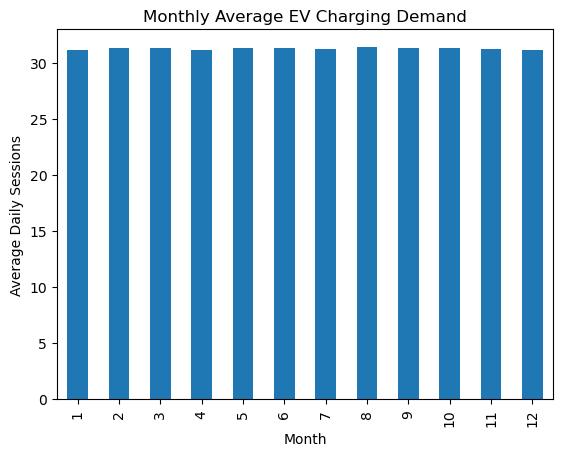

In [13]:
df["month"] = df["date"].dt.month

monthly_avg = df.groupby("month")["sessions"].mean()

plt.figure()
monthly_avg.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Average Daily Sessions")
plt.title("Monthly Average EV Charging Demand")
plt.show()


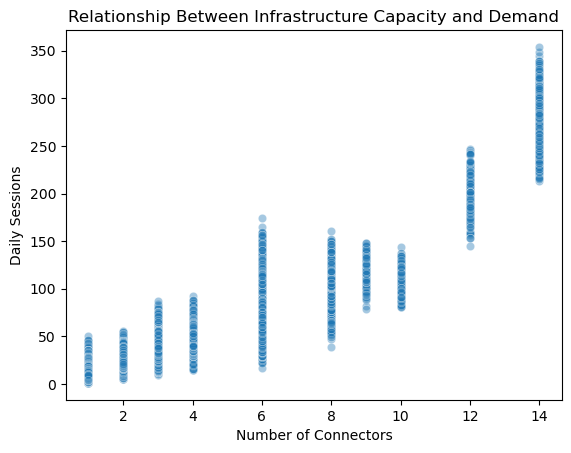

In [15]:
plt.figure()
sns.scatterplot(x="n_connectors", y="sessions", data=df, alpha=0.4)
plt.xlabel("Number of Connectors")
plt.ylabel("Daily Sessions")
plt.title("Relationship Between Infrastructure Capacity and Demand")
plt.show()


In [17]:
station_avg = df.groupby("station_id")["sessions"].mean()

top_stations = station_avg.sort_values(ascending=False).head(10)
bottom_stations = station_avg.sort_values().head(10)

top_stations, bottom_stations


(station_id
 BRI_0123    292.106557
 BRI_0119    256.871585
 BRI_0136    199.497268
 BRI_0102    197.338798
 BRI_0017    132.278689
 BRI_0120    122.844262
 BRI_0021    117.251366
 BRI_0103    107.314208
 BRI_0117    105.732240
 BRI_0088    105.628415
 Name: sessions, dtype: float64,
 station_id
 BRI_0118    6.835616
 BRI_0038    7.248634
 BRI_0121    7.355191
 BRI_0116    7.402740
 BRI_0030    8.101093
 BRI_0077    8.319672
 BRI_0058    8.601093
 BRI_0139    8.833333
 BRI_0036    8.915301
 BRI_0039    9.016393
 Name: sessions, dtype: float64)

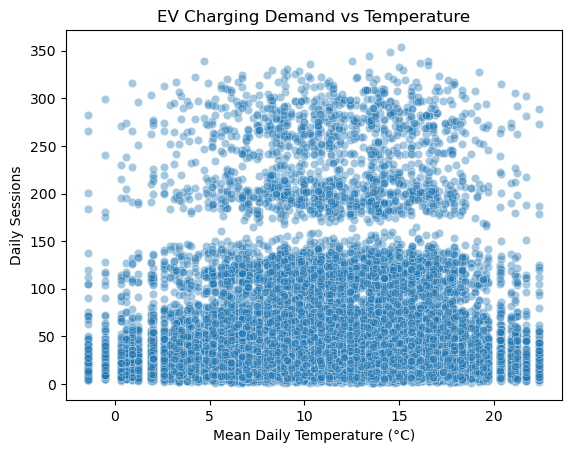

In [19]:
plt.figure()
sns.scatterplot(
    x="temperature_2m_mean",
    y="sessions",
    data=df,
    alpha=0.4
)
plt.xlabel("Mean Daily Temperature (°C)")
plt.ylabel("Daily Sessions")
plt.title("EV Charging Demand vs Temperature")
plt.show()


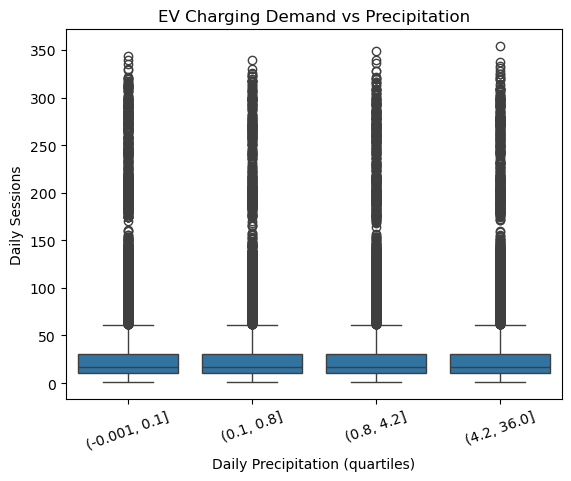

In [23]:
plt.figure()

df["precip_bin"] = pd.qcut(df["precipitation_sum"], q=4, duplicates="drop")

sns.boxplot(
    data=df,
    x="precip_bin",
    y="sessions"
)

plt.xlabel("Daily Precipitation (quartiles)")
plt.ylabel("Daily Sessions")
plt.title("EV Charging Demand vs Precipitation")
plt.xticks(rotation=20)
plt.show()



In [25]:
station_summary = (
    df.groupby("station_id")
      .agg(
          avg_sessions=("sessions", "mean"),
          avg_daily_traffic_nearby=("avg_daily_traffic_nearby", "first")
      )
      .reset_index()
)

station_summary.head()



,station_id,avg_sessions,avg_daily_traffic_nearby
0,BRI_0000,36.786885,8465
1,BRI_0001,17.051913,29273
2,BRI_0002,65.614754,8465
3,BRI_0003,13.103825,358
4,BRI_0004,11.120219,3936


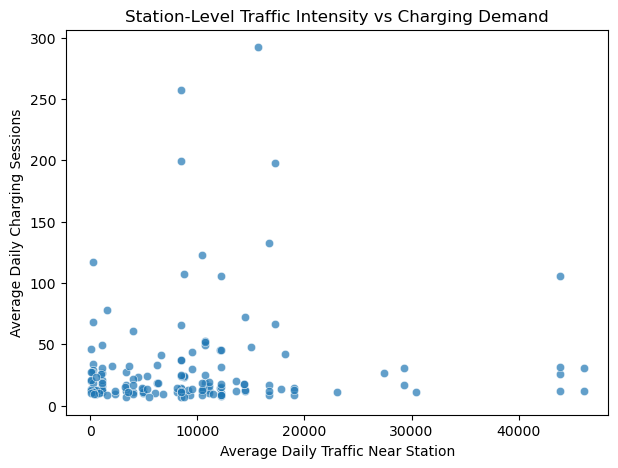

In [27]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data=station_summary,
    x="avg_daily_traffic_nearby",
    y="avg_sessions",
    alpha=0.7
)

plt.xlabel("Average Daily Traffic Near Station")
plt.ylabel("Average Daily Charging Sessions")
plt.title("Station-Level Traffic Intensity vs Charging Demand")
plt.show()


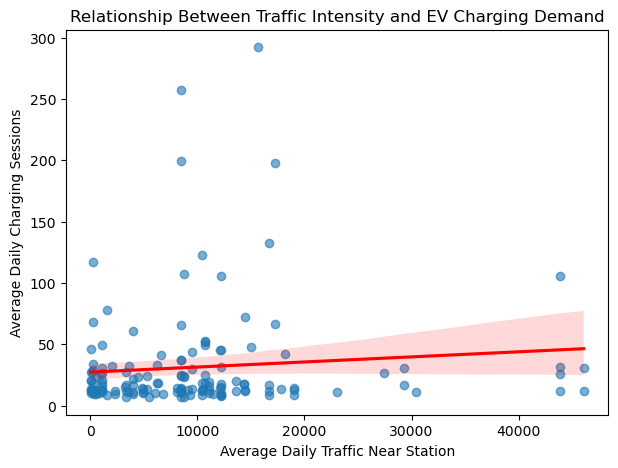

In [29]:
plt.figure(figsize=(7,5))

sns.regplot(
    data=station_summary,
    x="avg_daily_traffic_nearby",
    y="avg_sessions",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

plt.xlabel("Average Daily Traffic Near Station")
plt.ylabel("Average Daily Charging Sessions")
plt.title("Relationship Between Traffic Intensity and EV Charging Demand")
plt.show()


In [31]:
station_summary["traffic_bin"] = pd.qcut(
    station_summary["avg_daily_traffic_nearby"],
    q=4,
    labels=["Low", "Medium-Low", "Medium-High", "High"]
)


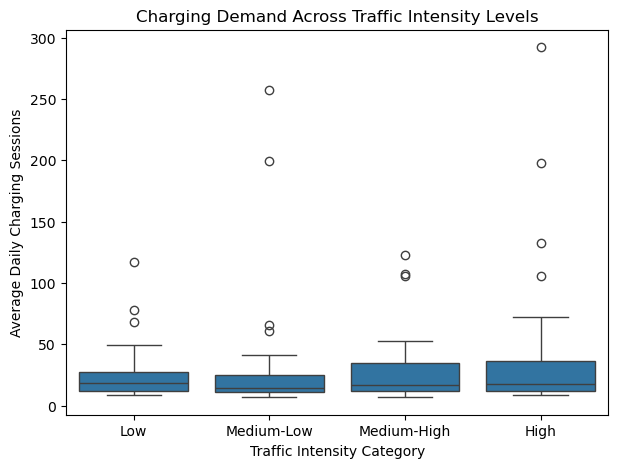

In [33]:
plt.figure(figsize=(7,5))

sns.boxplot(
    data=station_summary,
    x="traffic_bin",
    y="avg_sessions"
)

plt.xlabel("Traffic Intensity Category")
plt.ylabel("Average Daily Charging Sessions")
plt.title("Charging Demand Across Traffic Intensity Levels")
plt.show()


In [35]:
corr = station_summary[["avg_sessions", "avg_daily_traffic_nearby"]].corr()
corr


,avg_sessions,avg_daily_traffic_nearby
avg_sessions,1.000000,0.095124
avg_daily_traffic_nearby,0.095124,1.000000


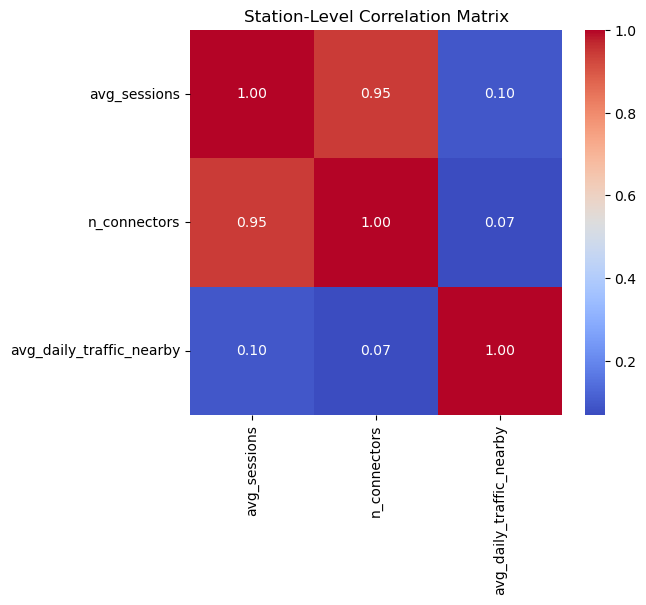

In [37]:
# Aggregate to station level
station_corr_df = (
    df.groupby("station_id")
      .agg(
          avg_sessions=("sessions", "mean"),
          n_connectors=("n_connectors", "first"),
          avg_daily_traffic_nearby=("avg_daily_traffic_nearby", "first"),
          latitude=("latitude", "first"),
          longitude=("longitude", "first")
      )
      .reset_index()
)

# Correlation matrix
corr_features = [
    "avg_sessions",
    "n_connectors",
    "avg_daily_traffic_nearby"
]

corr = station_corr_df[corr_features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Station-Level Correlation Matrix")
plt.show()


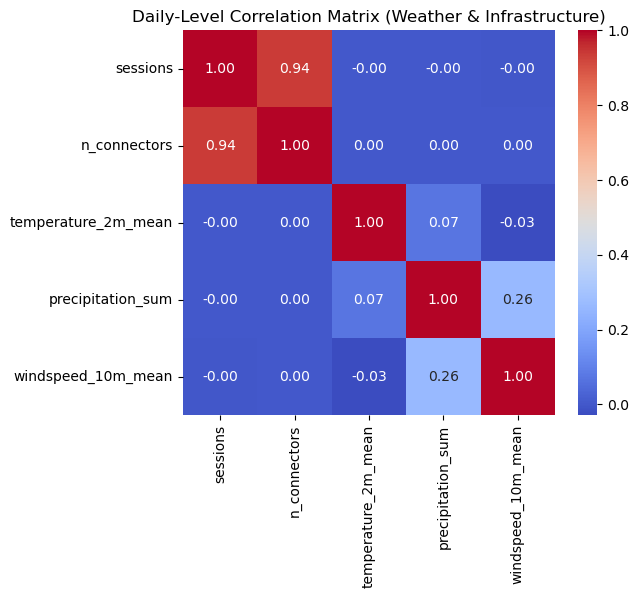

In [39]:
corr_features = [
    "sessions",
    "n_connectors",
    "temperature_2m_mean",
    "precipitation_sum",
    "windspeed_10m_mean"
]

corr = df[corr_features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Daily-Level Correlation Matrix (Weather & Infrastructure)")
plt.show()
